# <center> Artifitial Intelligence Project </center>


## <center> TITLE: Disease prediction using Machine Learning </center>

<center>  <b> Team members: </b>
Namitha Nagaraju
Syeda Fatiha Buttul <center>

<center> <b> Under the Guidance of: </b>
    Vahid Behzadan </center>

 <center> <b> Date: </b>
6th December 2021 </center>

In [1]:
import statsmodels.api as sm
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np

# DATA CLEANING & DATA EXPLORATION (TRAIN DATA)

In [3]:
#Reading trainining data
data_train = pd.read_csv("/Users/Namithalu/Desktop/AI Project/archive/training.csv")

In [4]:
#Total number of rows/samples in the training dataset
index = data_train.index
print("SAMPLE SIZE:",len(index))

SAMPLE SIZE: 4920


In [5]:
print("There are in total",len(data_train.columns),"columns")
for columns in data_train.columns:
    print(columns)  

There are in total 134 columns
itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puff

In [7]:
#removing last invalid column
data_train = data_train.iloc[:,:-1]
data_train.head(2)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
# Checking for null values/missing values : There are no null values
data_train.isnull().values.any()

False

In [9]:
# Checking domain of the columns. We are not going to scale the data since there are only two domains
print("THERE ARE NO OUTLIARS IN THE TRAIN DATASET: \n")
columns=list(data_train.columns.values.tolist())
for column in columns[:-1]:
    print(column,"'s domain is'",data_train[column].unique())

THERE ARE NO OUTLIARS IN THE TRAIN DATASET: 

itching 's domain is' [1 0]
skin_rash 's domain is' [1 0]
nodal_skin_eruptions 's domain is' [1 0]
continuous_sneezing 's domain is' [0 1]
shivering 's domain is' [0 1]
chills 's domain is' [0 1]
joint_pain 's domain is' [0 1]
stomach_pain 's domain is' [0 1]
acidity 's domain is' [0 1]
ulcers_on_tongue 's domain is' [0 1]
muscle_wasting 's domain is' [0 1]
vomiting 's domain is' [0 1]
burning_micturition 's domain is' [0 1]
spotting_ urination 's domain is' [0 1]
fatigue 's domain is' [0 1]
weight_gain 's domain is' [0 1]
anxiety 's domain is' [0 1]
cold_hands_and_feets 's domain is' [0 1]
mood_swings 's domain is' [0 1]
weight_loss 's domain is' [0 1]
restlessness 's domain is' [0 1]
lethargy 's domain is' [0 1]
patches_in_throat 's domain is' [0 1]
irregular_sugar_level 's domain is' [0 1]
cough 's domain is' [0 1]
high_fever 's domain is' [0 1]
sunken_eyes 's domain is' [0 1]
breathlessness 's domain is' [0 1]
sweating 's domain is' [0 

In [11]:
# The different classes to classify are:
print("THERE ARE IN TOTAL", len(data_train[columns[-1]].unique()),"CLASSES OR DISEASES THAT CAN BE PREDICTED. TEHY ARE: \n")
print(data_train[columns[-1]].unique())


THERE ARE IN TOTAL 41 CLASSES OR DISEASES THAT CAN BE PREDICTED. TEHY ARE: 

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [12]:
# To check how many of the samples we have for each class
print("THIS IS A BALANCED DATASET",data_train.groupby('prognosis').size())

THIS IS A BALANCED DATASET prognosis
(vertigo) Paroymsal  Positional Vertigo    120
AIDS                                       120
Acne                                       120
Alcoholic hepatitis                        120
Allergy                                    120
Arthritis                                  120
Bronchial Asthma                           120
Cervical spondylosis                       120
Chicken pox                                120
Chronic cholestasis                        120
Common Cold                                120
Dengue                                     120
Diabetes                                   120
Dimorphic hemmorhoids(piles)               120
Drug Reaction                              120
Fungal infection                           120
GERD                                       120
Gastroenteritis                            120
Heart attack                               120
Hepatitis B                                120
Hepatitis C            

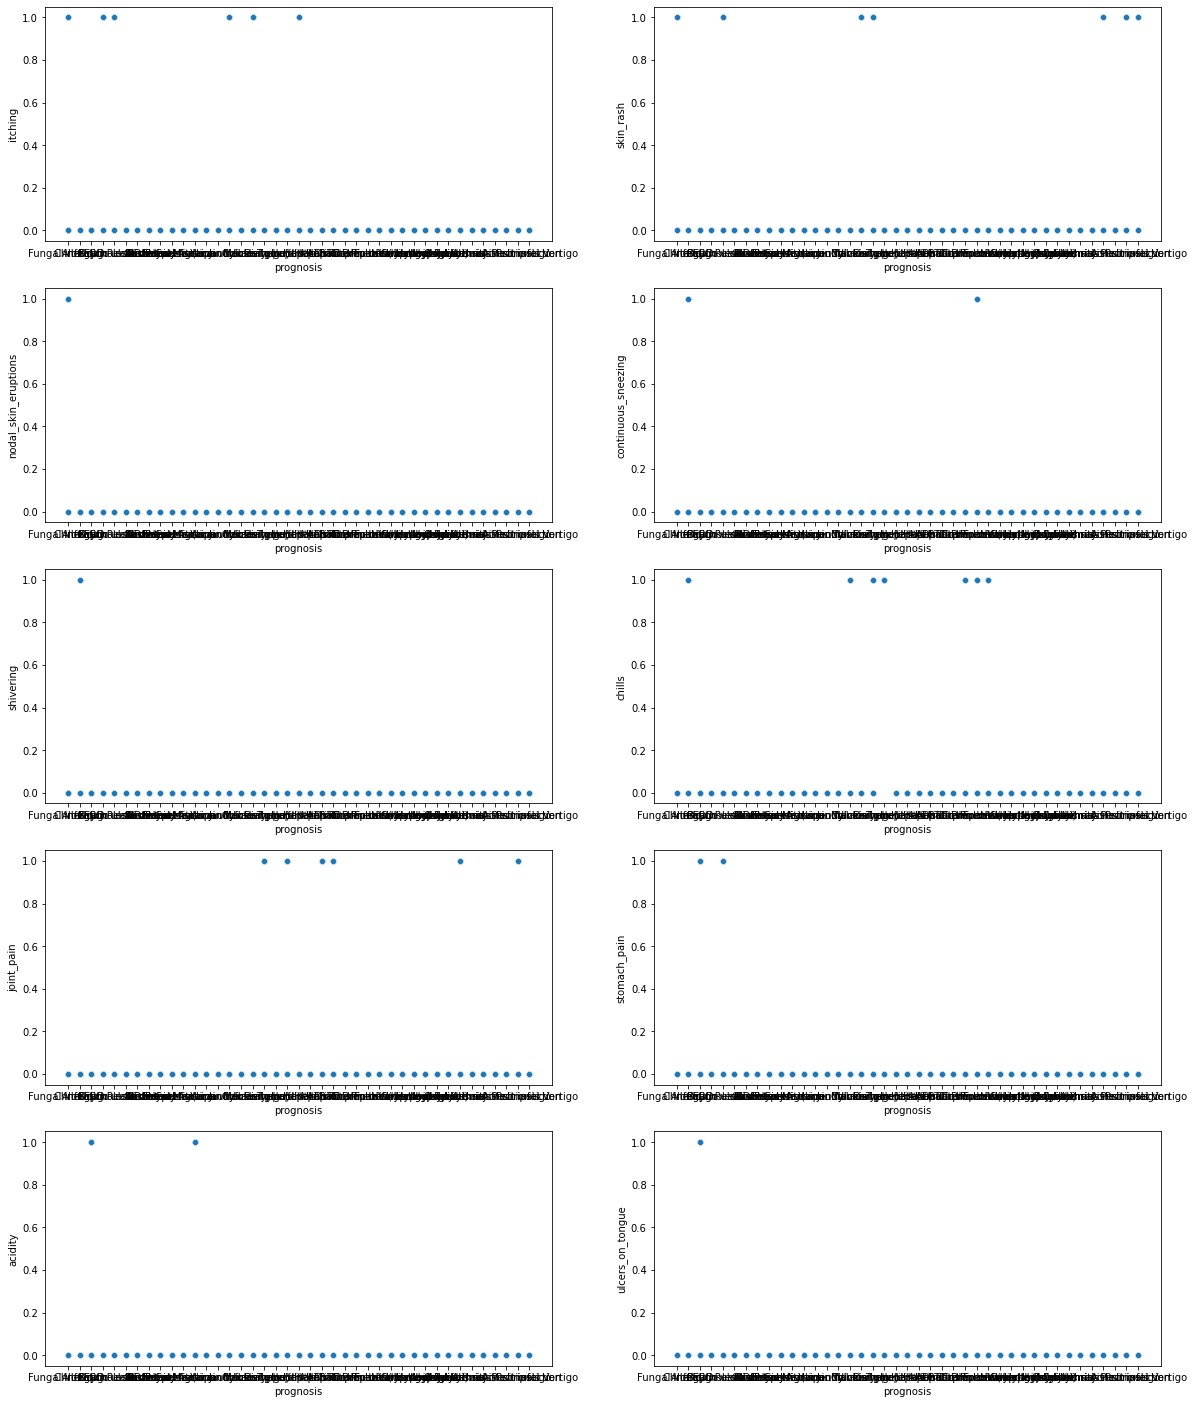

In [13]:
# Looks like there is a clear correlation between a symptoms and many prognosis classes. For example, in most of the 
# samples when itching is a symptom, we can see only few diseases have more samples clustered in their axis
fig, axs = pyplot.subplots(5,2,figsize=(20,25))
counter=-1
for i in range(0,5):
    for j in range(0,2):
        counter=counter+1
        sns.scatterplot(y=columns[counter], x="prognosis", data=data_train,ax=axs[i][j])

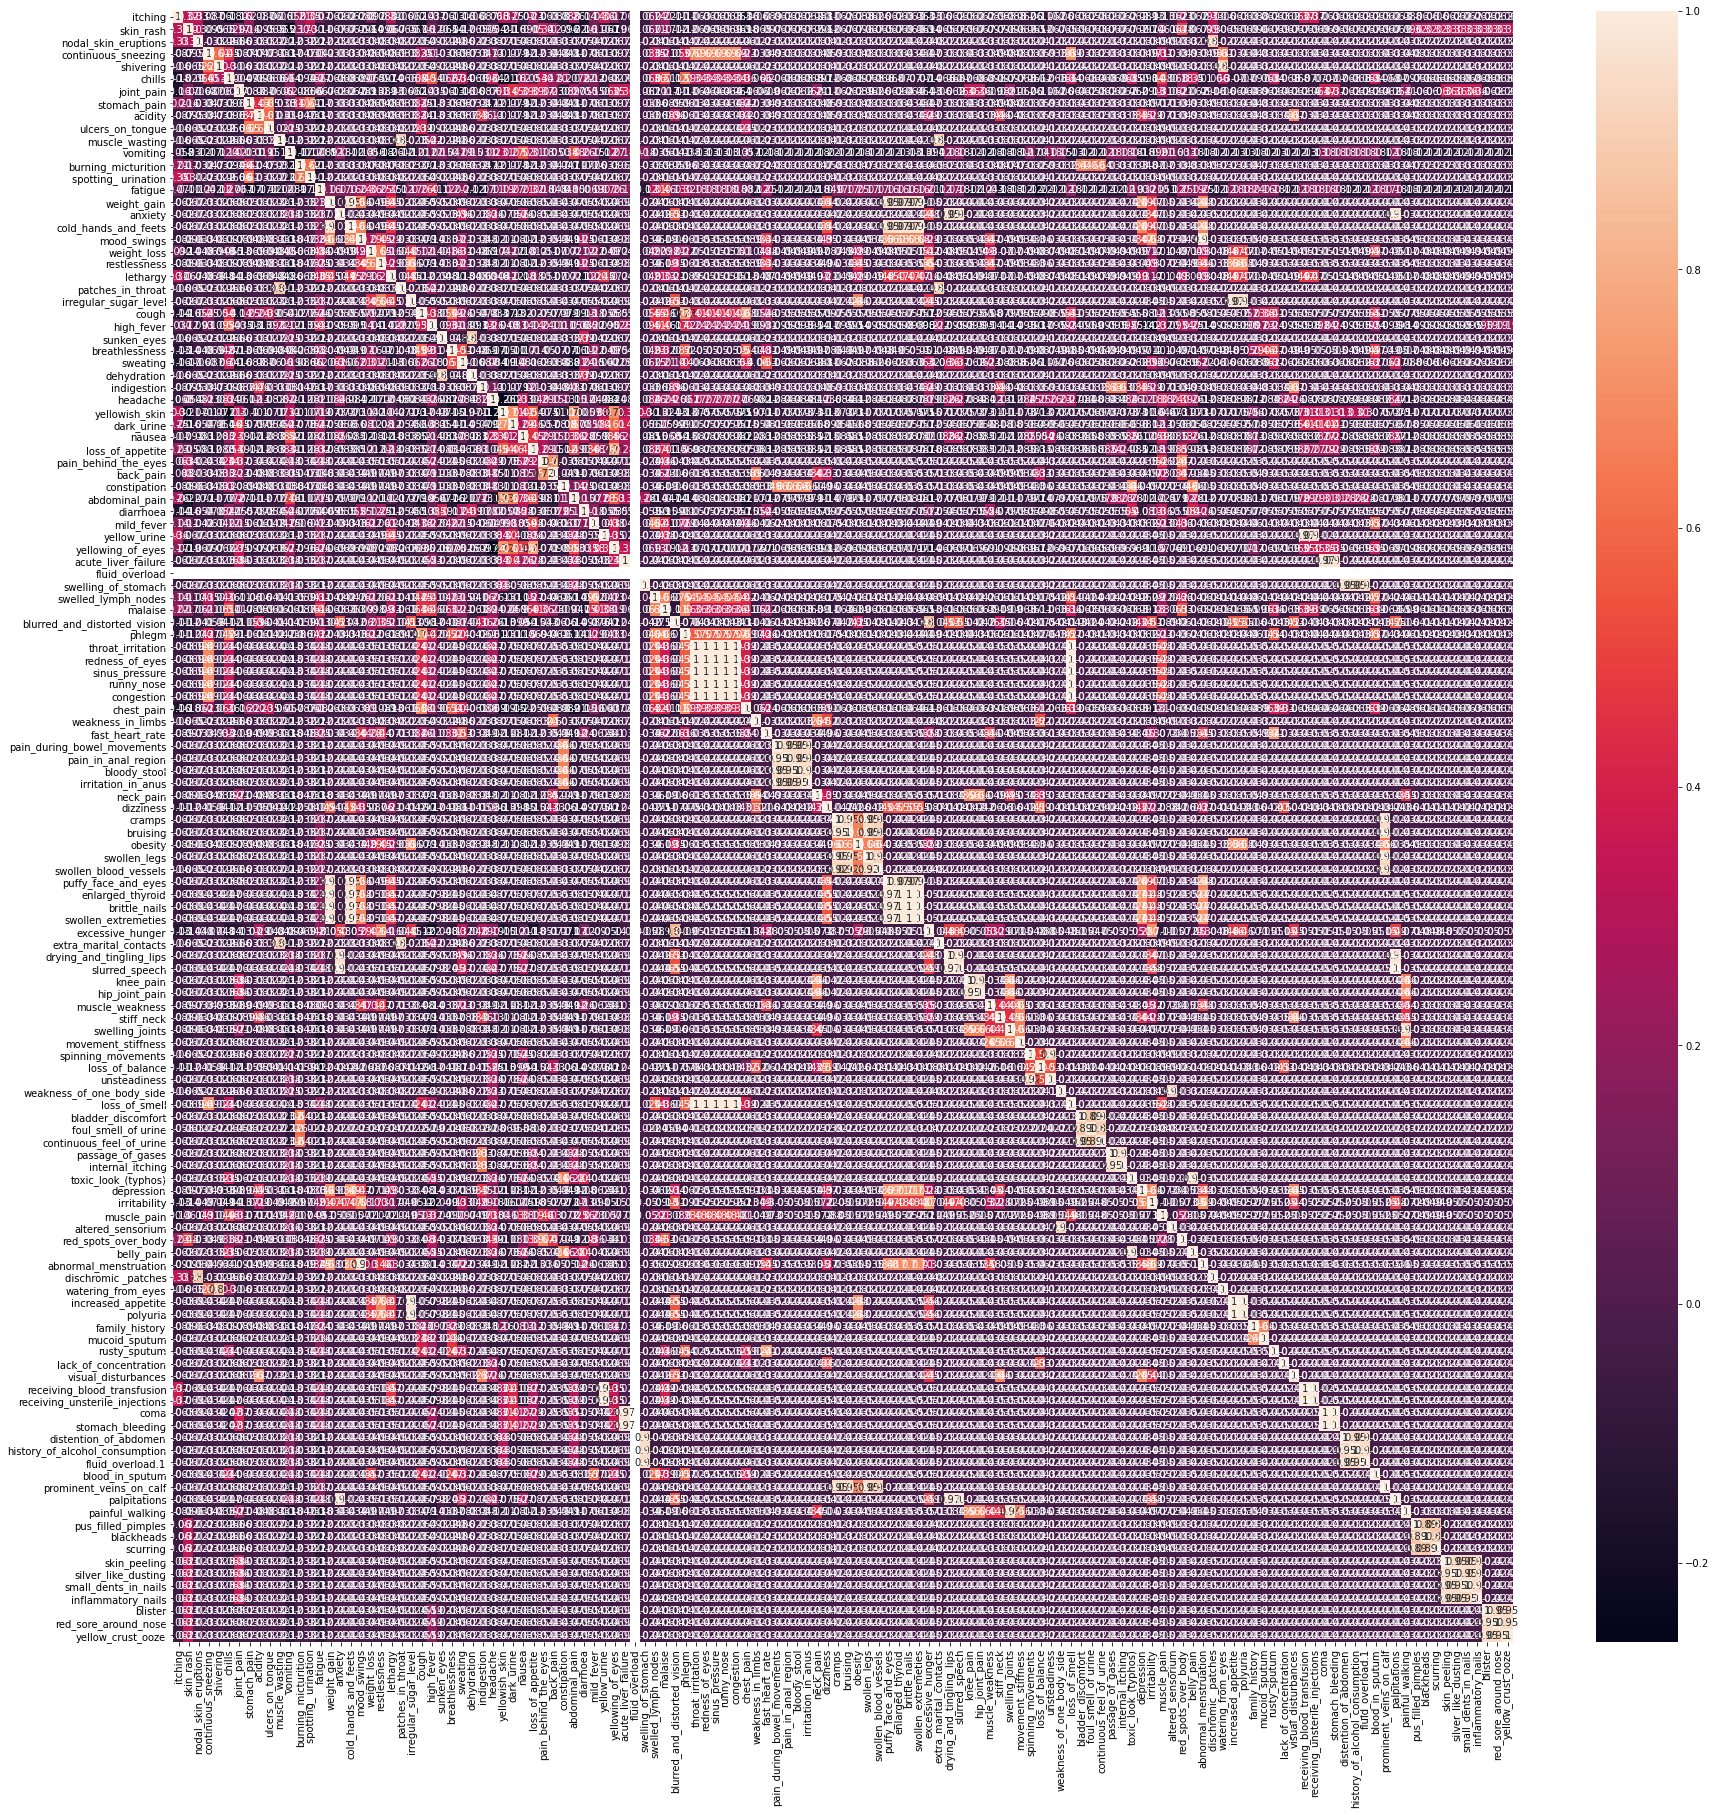

In [14]:
# correlation heatmap to find relationship between symptoms
plt.figure(figsize = (30, 30))
sns.heatmap(data_train.corr(), annot = True)
plt.show()

In [15]:
# Unsupervised ML model for cluster analysis
cluster= KMeans(n_clusters=41)
data_kmean = data_train
data_kmean["Cluster"]=cluster.fit_predict(data_train[data_train.columns[:-1]])

In [16]:
data_kmean.iloc[:,-2:].sort_values("Cluster")

,prognosis,Cluster
1920,Dimorphic hemmorhoids(piles),0
3431,Dimorphic hemmorhoids(piles),0
2980,Dimorphic hemmorhoids(piles),0
691,Dimorphic hemmorhoids(piles),0
690,Dimorphic hemmorhoids(piles),0
...,...,...
2423,Acne,40
4424,Acne,40
2907,Acne,40
2425,Acne,40


In [17]:
# K-means correctly clusters the symptoms when n_clusters = 41
print (data_kmean.groupby('prognosis')['Cluster'].nunique())

prognosis
(vertigo) Paroymsal  Positional Vertigo    1
AIDS                                       1
Acne                                       1
Alcoholic hepatitis                        1
Allergy                                    1
Arthritis                                  1
Bronchial Asthma                           1
Cervical spondylosis                       1
Chicken pox                                1
Chronic cholestasis                        1
Common Cold                                1
Dengue                                     1
Diabetes                                   1
Dimorphic hemmorhoids(piles)               1
Drug Reaction                              1
Fungal infection                           1
GERD                                       1
Gastroenteritis                            1
Heart attack                               1
Hepatitis B                                1
Hepatitis C                                1
Hepatitis D                                1


# DATA CLEANING (TEST DATA)

In [18]:
#Reading test data
data_test = pd.read_csv("/Users/Namithalu/Desktop/AI Project/archive/testing.csv")

In [19]:
#Total number of rows/samples in the test dataset
index = data_test.index
print("SAMPLE SIZE:",len(index))

SAMPLE SIZE: 42


In [20]:
# There are no invalid columns
print("There are in total",len(data_test.columns),"columns")
for columns in data_test.columns:
    print(columns) 

There are in total 133 columns
itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puff

In [21]:
# Checking for null values/missing values : There are no null values
data_test.isnull().values.any()

False

In [22]:
# Checking domain of the columns. We are not going to scale the data since there are only two domains
print("THERE ARE NO OUTLIARS IN THE TEST DATASET: \n")
columns=list(data_test.columns.values.tolist())
for column in columns[:-1]:
    print(column,"'s domain is'",data_test[column].unique())

THERE ARE NO OUTLIARS IN THE TEST DATASET: 

itching 's domain is' [1 0]
skin_rash 's domain is' [1 0]
nodal_skin_eruptions 's domain is' [1 0]
continuous_sneezing 's domain is' [0 1]
shivering 's domain is' [0 1]
chills 's domain is' [0 1]
joint_pain 's domain is' [0 1]
stomach_pain 's domain is' [0 1]
acidity 's domain is' [0 1]
ulcers_on_tongue 's domain is' [0 1]
muscle_wasting 's domain is' [0 1]
vomiting 's domain is' [0 1]
burning_micturition 's domain is' [0 1]
spotting_ urination 's domain is' [0 1]
fatigue 's domain is' [0 1]
weight_gain 's domain is' [0 1]
anxiety 's domain is' [0 1]
cold_hands_and_feets 's domain is' [0 1]
mood_swings 's domain is' [0 1]
weight_loss 's domain is' [0 1]
restlessness 's domain is' [0 1]
lethargy 's domain is' [0 1]
patches_in_throat 's domain is' [0 1]
irregular_sugar_level 's domain is' [0 1]
cough 's domain is' [0 1]
high_fever 's domain is' [0 1]
sunken_eyes 's domain is' [0 1]
breathlessness 's domain is' [0 1]
sweating 's domain is' [0 1

In [23]:
# The different classes to classify are:
print("THERE ARE IN TOTAL", len(data_test[columns[-1]].unique()),"CLASSES OR DISEASES THAT CAN BE PREDICTED. TEHY ARE: \n")
print(data_test[columns[-1]].unique())

THERE ARE IN TOTAL 41 CLASSES OR DISEASES THAT CAN BE PREDICTED. TEHY ARE: 

['Fungal infection' 'Allergy' 'GERD' 'Chronic cholestasis' 'Drug Reaction'
 'Peptic ulcer diseae' 'AIDS' 'Diabetes ' 'Gastroenteritis'
 'Bronchial Asthma' 'Hypertension ' 'Migraine' 'Cervical spondylosis'
 'Paralysis (brain hemorrhage)' 'Jaundice' 'Malaria' 'Chicken pox'
 'Dengue' 'Typhoid' 'hepatitis A' 'Hepatitis B' 'Hepatitis C'
 'Hepatitis D' 'Hepatitis E' 'Alcoholic hepatitis' 'Tuberculosis'
 'Common Cold' 'Pneumonia' 'Dimorphic hemmorhoids(piles)' 'Heart attack'
 'Varicose veins' 'Hypothyroidism' 'Hyperthyroidism' 'Hypoglycemia'
 'Osteoarthristis' 'Arthritis' '(vertigo) Paroymsal  Positional Vertigo'
 'Acne' 'Urinary tract infection' 'Psoriasis' 'Impetigo']


In [24]:
# To check how many of the samples we have for each class. 
# We have aproximately one sample for each class in the test dataset
print("TEST DATA IS TOO SMALL",data_test.groupby('prognosis').size())

TEST DATA IS TOO SMALL prognosis
(vertigo) Paroymsal  Positional Vertigo    1
AIDS                                       1
Acne                                       1
Alcoholic hepatitis                        1
Allergy                                    1
Arthritis                                  1
Bronchial Asthma                           1
Cervical spondylosis                       1
Chicken pox                                1
Chronic cholestasis                        1
Common Cold                                1
Dengue                                     1
Diabetes                                   1
Dimorphic hemmorhoids(piles)               1
Drug Reaction                              1
Fungal infection                           2
GERD                                       1
Gastroenteritis                            1
Heart attack                               1
Hepatitis B                                1
Hepatitis C                                1
Hepatitis D           

In [25]:
# Increasing the size of test data
data_test=data_train.groupby("prognosis").sample(n=50, random_state=1)
print("THIS IS A BALANCED DATASET",data_test.groupby('prognosis').size())

THIS IS A BALANCED DATASET prognosis
(vertigo) Paroymsal  Positional Vertigo    50
AIDS                                       50
Acne                                       50
Alcoholic hepatitis                        50
Allergy                                    50
Arthritis                                  50
Bronchial Asthma                           50
Cervical spondylosis                       50
Chicken pox                                50
Chronic cholestasis                        50
Common Cold                                50
Dengue                                     50
Diabetes                                   50
Dimorphic hemmorhoids(piles)               50
Drug Reaction                              50
Fungal infection                           50
GERD                                       50
Gastroenteritis                            50
Heart attack                               50
Hepatitis B                                50
Hepatitis C                                

# SELECTING MODELS

In [48]:
X_train = data_train.iloc[:,:-2]
X_test = data_test.iloc[:,:-2]
y_train = data_train.iloc[:,-2]
y_test = data_test.iloc[:,-2]

In [49]:
print(X_train.info())
X_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 132 entries, itching to yellow_crust_ooze
dtypes: int64(132)
memory usage: 5.0 MB
None


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
print(X_test.info())
X_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2050 entries, 3931 to 3463
Columns: 132 entries, itching to yellow_crust_ooze
dtypes: int64(132)
memory usage: 2.1 MB
None


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
3931,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2414,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
y_train.head()

0    Fungal infection
1    Fungal infection
2    Fungal infection
3    Fungal infection
4    Fungal infection
Name: prognosis, dtype: object

In [52]:
y_test.head()

3931    (vertigo) Paroymsal  Positional Vertigo
2414    (vertigo) Paroymsal  Positional Vertigo
2419    (vertigo) Paroymsal  Positional Vertigo
4833    (vertigo) Paroymsal  Positional Vertigo
3193    (vertigo) Paroymsal  Positional Vertigo
Name: prognosis, dtype: object

In [53]:
# Label Encoding refers to converting the labels into a numeric form so as to 
# convert them into the machine-readable form. Hence we are label encoding the prognosis column which 
# is a string datatype

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test= le.fit_transform(y_test)

In [54]:
LR = LogisticRegression(solver='lbfgs', random_state=555)
RF = RandomForestClassifier(n_estimators = 100, random_state=555)
SVM = SVC(random_state=0, probability=True)
KNC = KNeighborsClassifier()
DTC = DecisionTreeClassifier()
ABC = AdaBoostClassifier(n_estimators = 100)
BC = BaggingClassifier(n_estimators = 100)
GBC = GradientBoostingClassifier(n_estimators = 100)


In [61]:
for clf, label in zip([LR, RF,SVM, KNC, DTC, ABC, BC, GBC],
                      ['Logistic Regression',
                       'Random Forest',
                       'Support Vector Machine',
                       'KNeighbors',
                       'Decision Tree',
                       'Ada Boost',
                       'Bagging',
                       'Gradient Boosting']):
    scores = sklearn.model_selection.cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
    print("=============",label,"=================")
    print("\nTRAIN CV ACCURANCY: %0.3f" % (scores.mean()))
    results = clf.fit(X_train, y_train)
    y_predicted=clf.predict(X_test)
    print("\nTEST ACCURACY: %0.3f " % (sklearn.metrics.accuracy_score(y_predicted, y_test)))
    print("\nCONFUSION MATRIX:")
    print(confusion_matrix(y_test, y_predicted))
    print("\nCLASSIFICATION REPORT")
    print(classification_report(y_test, y_predicted))
    print("\n\n")

============= Logistic Regression =================

TRAIN CV ACCURANCY: 1.000

TEST ACCURACY: 1.000 

CONFUSION MATRIX:
[[50  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  0 ...  0  0 50]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        

============= KNeighbors =================

TRAIN CV ACCURANCY: 1.000

TEST ACCURACY: 1.000 

CONFUSION MATRIX:
[[50  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  0 ...  0  0 50]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        50
      

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


============= Bagging =================

TRAIN CV ACCURANCY: 1.000

TEST ACCURACY: 1.000 

CONFUSION MATRIX:
[[50  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  0]
 [ 0  0 50 ...  0  0  0]
 ...
 [ 0  0  0 ... 50  0  0]
 [ 0  0  0 ...  0 50  0]
 [ 0  0  0 ...  0  0 50]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        50
           4       1.00      1.00      1.00        50
           5       1.00      1.00      1.00        50
           6       1.00      1.00      1.00        50
           7       1.00      1.00      1.00        50
           8       1.00      1.00      1.00        50
           9       1.00      1.00      1.00        50
          10       1.00      1.00      1.00        50
          11       1.00      1.00      1.00        50
         

In [57]:
# Using decison trees
DTR = DecisionTreeClassifier(random_state=0)
DTR.fit(X_train, y_train)
y_predicted = DTR.predict(X_test)
Feature_importance = pd.DataFrame(DTR.feature_importances_*100, X_train.columns, columns=['Importance'])
Feature_importance.sort_values(by='Importance',inplace=True,ascending=False)
Feature_importance

,Importance
fatigue,2.707707
receiving_blood_transfusion,2.500000
stomach_bleeding,2.500000
abnormal_menstruation,2.500000
polyuria,2.500000
...,...
extra_marital_contacts,0.000000
brittle_nails,0.000000
enlarged_thyroid,0.000000
puffy_face_and_eyes,0.000000


In [58]:
print("THE MOST IMPORTANT FEATURES WHILE DIAGNISING VALUES ARE:")
print(np.array(Feature_importance[Feature_importance['Importance'] != 0].index))

THE MOST IMPORTANT FEATURES WHILE DIAGNISING VALUES ARE:
['fatigue' 'receiving_blood_transfusion' 'stomach_bleeding'
 'abnormal_menstruation' 'polyuria' 'loss_of_smell' 'rusty_sputum'
 'swollen_extremeties' 'muscle_pain' 'mild_fever' 'blood_in_sputum'
 'palpitations' 'pain_behind_the_eyes' 'malaise' 'chills'
 'altered_sensorium' 'bladder_discomfort' 'excessive_hunger'
 'distention_of_abdomen' 'movement_stiffness' 'skin_peeling'
 'yellow_crust_ooze' 'unsteadiness' 'passage_of_gases' 'mucoid_sputum'
 'pain_during_bowel_movements' 'knee_pain' 'swollen_legs' 'diarrhoea'
 'weight_loss' 'lack_of_concentration' 'dizziness' 'chest_pain'
 'dark_urine' 'cough' 'family_history' 'high_fever' 'nodal_skin_eruptions'
 'spotting_ urination' 'pus_filled_pimples' 'yellowing_of_eyes' 'itching'
 'headache' 'joint_pain' 'dischromic _patches' 'shivering' 'scurring'
 'blister' 'breathlessness' 'acidity' 'skin_rash' 'muscle_weakness'
 'weakness_of_one_body_side' 'pain_in_anal_region' 'burning_micturition'
 'v

In [59]:
print("THE UNIMPORTANT FEATURES WHILE DIAGNOSING VALUES ARE:")
print(np.array(Feature_importance[Feature_importance['Importance'] ==0].index))

THE UNIMPORTANT FEATURES WHILE DIAGNOSING VALUES ARE:
['depression' 'irritability' 'lethargy' 'anxiety' 'weight_gain'
 'cold_hands_and_feets' 'mood_swings' 'increased_appetite'
 'watering_from_eyes' 'restlessness' 'red_spots_over_body' 'belly_pain'
 'muscle_wasting' 'visual_disturbances' 'painful_walking'
 'red_sore_around_nose' 'inflammatory_nails' 'small_dents_in_nails'
 'silver_like_dusting' 'continuous_sneezing' 'blackheads'
 'prominent_veins_on_calf' 'internal_itching' 'stomach_pain'
 'fluid_overload.1' 'history_of_alcohol_consumption' 'ulcers_on_tongue'
 'coma' 'receiving_unsterile_injections' 'toxic_look_(typhos)'
 'yellow_urine' 'patches_in_throat' 'sinus_pressure' 'irritation_in_anus'
 'bloody_stool' 'loss_of_appetite' 'fast_heart_rate' 'back_pain'
 'congestion' 'runny_nose' 'redness_of_eyes' 'continuous_feel_of_urine'
 'throat_irritation' 'phlegm' 'constipation' 'swelled_lymph_nodes'
 'swelling_of_stomach' 'fluid_overload' 'acute_liver_failure' 'neck_pain'
 'nausea' 'cramps' 

## Conclusion: 
### We have obtained 100% Train and test accuracy for almost all of the classification algorithms. 
### Any of these models can we used to accurately predict the diseases

# <center> THANK YOU </center>